# Análise exploratória

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import matplotlib.pyplot as plt

In [3]:
df = pd.read_parquet('dados/articles2.parquet')
df

,title,title_alt,authors,advisor1,advisor2,keywords,date,publisher,campus,citation,resumo,abstract,uri,pdf_uri
0,Validação de modelos utilizando problemas inve...,None,"[Silva, Vinícius Vitorelli Generoso da]","Koroishi, Edson Hideki",None,"[Problemas inversos (Equações diferenciais), V...",5000,Universidade Tecnológica Federal do Paraná,Cornelio Procopio,"SILVA, Vinícius Vitorelli Generoso da. Validaç...",Existe uma dificuldade desde os primórdios da ...,From the beginning there is difficulty in engi...,http://repositorio.utfpr.edu.br/jspui/handle/1...,https://repositorio.utfpr.edu.br/jspui/bitstre...
1,Destinação do lodo de estação de tratamento de...,Disposal of water treatment plant sludge in wa...,"[Tamankievies, Daniela Fatima]","Bortoli, Marcelo",None,"[Água - Estações de tratamento, Lodo, Testes d...",27-Mar-2025,Universidade Tecnológica Federal do Paraná,Francisco Beltrao,"TAMANKIEVIES, Daniela Fatima. Destinação do lo...",O lodo gerado em Estações de Tratamento de Águ...,The sludge generated in Water Treatment Plants...,http://repositorio.utfpr.edu.br/jspui/handle/1...,https://repositorio.utfpr.edu.br/jspui/bitstre...
2,Gramep: método livre de alinhamento baseado no...,Gramep: an alignment-free method based on the ...,"[Zanon, Matheus Henrique Pimenta]","Lopes, Fabricio Martins",None,"[Genômica, Aprendizado do computador, Classifi...",27-Mar-2025,Universidade Tecnológica Federal do Paraná,Cornelio Procopio,"ZANON, Matheus Henrique Pimenta. Gramep: métod...",Com o avanço na tecnologia de sequenciamento d...,"With advances in DNA sequencing technology, th...",http://repositorio.utfpr.edu.br/jspui/handle/1...,https://repositorio.utfpr.edu.br/jspui/bitstre...
3,Frações na perspectiva de medição e a abordage...,Fractions from the measurement perspective and...,"[Shiinoki, Vanessa Garcia]","Rocha, Zenaide de Fatima Dante Correia",None,"[Matemática - Estudo e ensino, Frações, Mediçã...",27-Mar-2025,Universidade Tecnológica Federal do Paraná,Londrina,"SHIINOKI, Vanessa Garcia. Frações na perspecti...",O objetivo desta pesquisa foi analisar os proc...,The objective of this research was to analyze ...,http://repositorio.utfpr.edu.br/jspui/handle/1...,https://repositorio.utfpr.edu.br/jspui/bitstre...
4,Consciência fonológica na alfabetização: propo...,Phonological awareness in the literacy: a prop...,"[Rosa, Daniela Dala]","Denardi, Didie Ana Ceni",None,"[Língua inglesa, Fonologia, Literacia, Ensino ...",28-Mar-2025,Universidade Tecnológica Federal do Paraná,Pato Branco,"ROSA, Daniela Dala. Consciência fonológica na ...","Esta pesquisa explicatória (Gil, 2021) versa s...","This exploratory research (Gil, 2021) deals wi...",http://repositorio.utfpr.edu.br/jspui/handle/1...,https://repositorio.utfpr.edu.br/jspui/bitstre...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17775,Vibração livre e flambagem de placas de Mindli...,Free-vibration and buckling analysis of Mindli...,"[Araujo, Leilson Joaquim]","Abdalla Filho, João Elias",None,"[Vibração, Método dos elementos finitos, Flamb...",28-Mai-2021,Universidade Tecnológica Federal do Paraná,Curitiba,"ARAUJO, Leilson Joaquim. Vibração livre e flam...",O método dos elementos finitos (MEF) é um méto...,The finite element method (FEM) is an approxim...,http://repositorio.utfpr.edu.br/jspui/handle/1...,https://repositorio.utfpr.edu.br/jspui/bitstre...
17776,Equilíbrio de fases experimental de hidratos d...,Experimental phase equilibria of carbon dioxid...,"[Vasconcelos, Luiz Fernando Santos de]","Marcelino Neto, Moises Alves",None,"[Hidratos, Dióxido de carbono, Metano, Cloreto...",28-Mai-2021,Universidade Tecnológica Federal do Paraná,Curitiba,"VASCONCELOS, Luiz Fernando Santos de. Equilíbr...","Em certas condições termodinâmicas, as molécul...","Under certain thermodynamic conditions, water ...",http://repositorio.utfpr.edu.br/jspui/handle/1...,https://repositorio.utfpr.edu.br/jspui/bitstre...
17777,Influência das etapas de branqueamento e tempe...,Influence of bleaching s

## Tratar a data

In [ ]:
df.loc[0, 'date'] = '11-Fev-2015'

In [12]:
list(df['date'].unique())

['11-Fev-2015',
 '27-Mar-2025',
 '28-Mar-2025',
 '29-Mar-2025',
 '31-Mar-2025',
 '19-Dez-2024',
 '20-Dez-2024',
 '23-Dez-2024',
 '30-Dez-2024',
 '28-Dez-2024',
 '2025',
 '27-Dez-2024',
 '17-Jan-2025',
 '3-Fev-2025',
 '20-Jan-2025',
 '18-Jan-2025',
 '4-Fev-2025',
 '5-Fev-2025',
 '6-Fev-2025',
 '7-Fev-2025',
 '9-Fev-2025',
 '10-Fev-2025',
 '11-Fev-2025',
 '12-Fev-2025',
 '13-Fev-2025',
 '14-Fev-2025',
 '15-Fev-2025',
 '17-Fev-2025',
 '18-Fev-2025',
 '19-Fev-2025',
 '20-Fev-2025',
 '21-Fev-2025',
 '23-Fev-2025',
 '24-Fev-2025',
 '25-Fev-2025',
 '15-Ago-2024',
 '31-Jul-2024',
 '19-Jun-2024',
 '5-Jul-2024',
 '1-Jul-2024',
 '24-Mai-2024',
 '17-Jun-2024',
 '26-Mai-2024',
 '27-Mai-2024',
 '28-Mai-2024',
 '29-Mai-2024',
 '3-Jun-2024',
 '4-Jun-2024',
 '5-Jun-2024',
 '6-Jun-2024',
 '7-Jun-2024',
 '10-Jun-2024',
 '11-Jun-2024',
 '12-Jun-2024',
 '13-Jun-2024',
 '14-Jun-2024',
 '18-Jun-2024',
 '20-Jun-2024',
 '21-Jun-2024',
 '24-Jun-2024',
 '12-Dez-2023',
 '1-Dez-2023',
 '9-Dez-2023',
 '27-Nov-2023'

In [25]:
from datetime import datetime, date
import locale
locale.setlocale(locale.LC_ALL, "pt_BR.utf8")
formats = ("%d-%b-%Y", "%b-%Y", "%d-%b-%y", "%Y")

def parse_date(date):
    exs = []
    for fmt in formats:
         try:
            return datetime.strptime(date.replace(" ", ""), fmt)
         except Exception as ex:
            exs.append(ex)
    raise exs[0]
df['date_formated'] = df['date'].apply(parse_date)
df['date_formated']

0       2015-02-11
1       2025-03-27
2       2025-03-27
3       2025-03-27
4       2025-03-28
           ...    
17775   2021-05-28
17776   2021-05-28
17777   2021-05-28
17778   2021-05-31
17779   2021-05-28
Name: date_formated, Length: 17780, dtype: datetime64[ns]

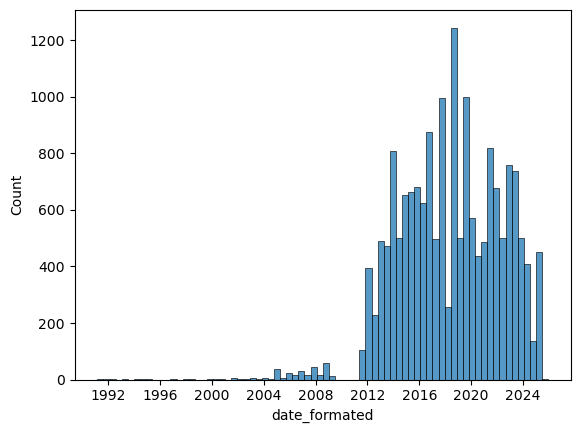

In [42]:
sns.histplot(df['date_formated'])
plt.show()

## Dar um Id

In [56]:
df['unique_id'] = df['uri'].str.extract(r"(/1)(/\d+)")[1].str.replace("/", "").astype(int)
df = df.set_index('unique_id')

Porcentagem de colunas nulas

In [70]:
(df.isnull().sum() / len(df)) * 100

title              0.000000
title_alt         33.751406
authors            0.000000
advisor1           1.141732
advisor2         100.000000
keywords           0.000000
date               0.000000
publisher          0.899888
campus             0.005624
citation           0.005624
resumo             0.551181
abstract           2.401575
uri                0.000000
pdf_uri            0.000000
date_formated      0.000000
dtype: float64

In [72]:
df = df.drop('advisor2', axis=1)
df

,title,title_alt,authors,advisor1,keywords,date,publisher,campus,citation,resumo,abstract,uri,pdf_uri,date_formated
unique_id,,,,,,,,,,,,,,
28320,Validação de modelos utilizando problemas inve...,None,"[Silva, Vinícius Vitorelli Generoso da]","Koroishi, Edson Hideki","[Problemas inversos (Equações diferenciais), V...",11-Fev-2015,Universidade Tecnológica Federal do Paraná,Cornelio Procopio,"SILVA, Vinícius Vitorelli Generoso da. Validaç...",Existe uma dificuldade desde os primórdios da ...,From the beginning there is difficulty in engi...,http://repositorio.utfpr.edu.br/jspui/handle/1...,https://repositorio.utfpr.edu.br/jspui/bitstre...,2015-02-11
36735,Destinação do lodo de estação de tratamento de...,Disposal of water treatment plant sludge in wa...,"[Tamankievies, Daniela Fatima]","Bortoli, Marcelo","[Água - Estações de tratamento, Lodo, Testes d...",27-Mar-2025,Universidade Tecnológica Federal do Paraná,Francisco Beltrao,"TAMANKIEVIES, Daniela Fatima. Destinação do lo...",O lodo gerado em Estações de Tratamento de Águ...,The sludge generated in Water Treatment Plants...,http://repositorio.utfpr.edu.br/jspui/handle/1...,https://repositorio.utfpr.edu.br/jspui/bitstre...,2025-03-27
36437,Gramep: método livre de alinhamento baseado no...,Gramep: an alignment-free method based on the ...,"[Zanon, Matheus Henrique Pimenta]","Lopes, Fabricio Martins","[Genômica, Aprendizado do computador, Classifi...",27-Mar-2025,Universidade Tecnológica Federal do Paraná,Cornelio Procopio,"ZANON, Matheus Henrique Pimenta. Gramep: métod...",Com o avanço na tecnologia de sequenciamento d...,"With advances in DNA sequencing technology, th...",http://repositorio.utfpr.edu.br/jspui/handle/1...,https://repositorio.utfpr.edu.br/jspui/bitstre...,2025-03-27
36652,Frações na perspectiva de medição e a abordage...,Fractions from the measurement perspective and...,"[Shiinoki, Vanessa Garcia]","Rocha, Zenaide de Fatima Dante Correia","[Matemática - Estudo e ensino, Frações, Mediçã...",27-Mar-2025,Universidade Tecnológica Federal do Paraná,Londrina,"SHIINOKI, Vanessa Garcia. Frações na perspecti...",O objetivo desta pesquisa foi analisar os proc...,The objective of this research was to analyze ...,http://repositorio.utfpr.edu.br/jspui/handle/1...,https://repositorio.utfpr.edu.br/jspui/bitstre...,2025-03-27
37105,Consciência fonológica na alfabetização: propo...,Phonological awareness in the literacy: a prop...,"[Rosa, Daniela Dala]","Denardi, Didie Ana Ceni","[Língua inglesa, Fonologia, Literacia, Ensino ...",28-Mar-2025,Universidade Tecnológica Federal do Paraná,Pato Branco,"ROSA, Daniela Dala. Consciência fonológica na ...","Esta pesquisa explicatória (Gil, 2021) versa s...","This exploratory research (Gil, 2021) deals wi...",http://repositorio.utfpr.edu.br/jspui/handle/1...,https://repositorio.utfpr.edu.br/jspui/bitstre...,2025-03-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26646,Vibração livre e flambagem de placas de Mindli...,Free-vibration and buckling analysis of Mindli...,"[Araujo, Leilson Joaquim]","Abdalla Filho, João Elias","[Vibração, Método dos elementos finitos, Flamb...",28-Mai-2021,Universidade Tecnológica Federal do Paraná,Curitiba,"ARAUJO, Leilson Joaquim. Vibração livre e flam...",O método dos elementos finitos (MEF) é um méto...,The finite element method (FEM) is an approxim...,http://repositorio.utfpr.edu.br/jspui/handle/1...,https://repositorio.utfpr.edu.br/jspui/bitstre...,2021-05-28
25542,Equilíbrio de fases experimental de hidratos d...,Experimental phase equilibria of carbon dioxid...,"[Vasconcelos, Luiz Fernando Santos de]","Marcelino Neto, Moises Alves","[Hidratos, Dióxido de carbono, Metano, Cloreto...",28-Mai-2021,Universidade Tecnológica Federal do Paraná,Curitiba,"VASCONCELOS, Luiz Fernando Santos de. Equilíbr...","Em certas condições termodinâmicas, as molécul...","Under certain thermodynamic conditions, water ...",http://repositorio.utfpr.edu.br/jspui/handle/1...,https://repositorio.utfpr.edu.br/jspui/bits

Countar quantidade de autores

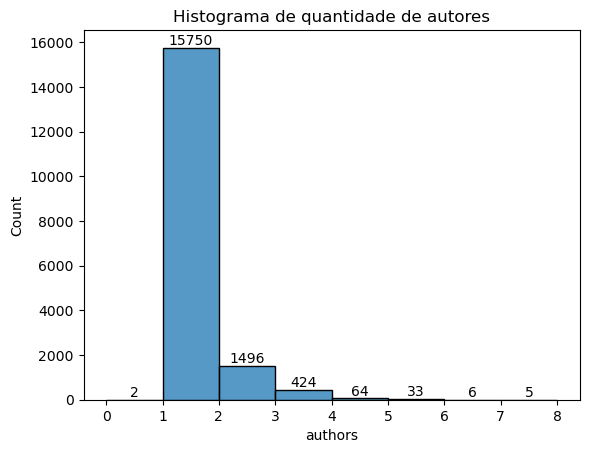

In [115]:
authors_count = df['authors'].apply(lambda x: len(x))
fig, ax = plt.subplots()
ax = sns.histplot(authors_count, bins=8)
ax.set_title("Histograma de quantidade de autores")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [90]:
authors_count.describe()

count    17780.000000
mean         1.153375
std          0.487353
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: authors, dtype: float64

Countar quantidade de keywords

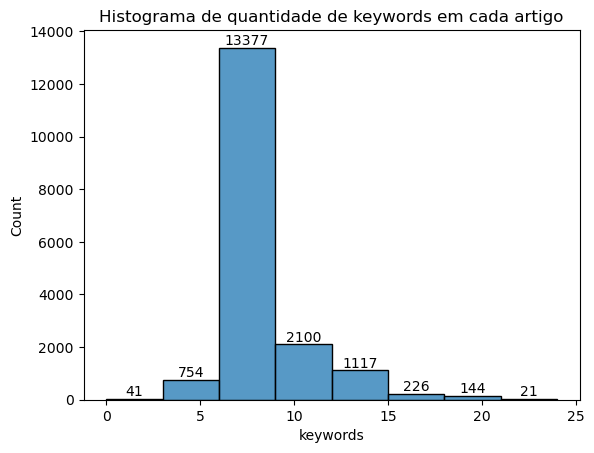

In [113]:
keywords_count = df['keywords'].apply(lambda x: len(x))
fig, ax = plt.subplots()
ax = sns.histplot(keywords_count, bins=8)
ax.set_title("Histograma de quantidade de keywords em cada artigo")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [92]:
keywords_count.describe()

count    17780.000000
mean         7.561305
std          2.514105
min          0.000000
25%          6.000000
50%          6.000000
75%          8.000000
max         24.000000
Name: keywords, dtype: float64

In [134]:
import unidecode
import re
from collections import defaultdict

kw_list = []
kw_dict = defaultdict(set)
def proccess_keyword(kw):
    kw = kw.strip()
    kw = unidecode.unidecode(kw)
    kw = kw.lower()
    return kw

def keyword_generator(kws):
    for kw in kws:
        kw = proccess_keyword(kw)
        sep = re.findall(r'([\w\s-]+)\s+-\s+([\w\s-]+)', kw)
        for (topic, subtopic) in sep:
            yield topic.strip()
            yield subtopic.strip()
        sep = re.findall(r'([\w\s]+)\(([\w\s]+)\)', kw)
        for (topic, subtopic) in sep:
            yield topic.strip()
            yield subtopic.strip()
        yield kw

for index, row in df.iterrows():
    for kw in keyword_generator(row['keywords']):
        if kw not in kw_dict[index]:
            kw_dict[index].add(kw)
            kw_list.append((index, kw))

kw_list

[(28320, 'problemas inversos'),
 (28320, 'equacoes diferenciais'),
 (28320, 'problemas inversos (equacoes diferenciais)'),
 (28320, 'vigas'),
 (28320, 'vibracao'),
 (28320, 'inverse problems'),
 (28320, 'differential equations'),
 (28320, 'inverse problems (differential equations)'),
 (28320, 'girders'),
 (28320, 'vibration'),
 (36735, 'agua'),
 (36735, 'estacoes de tratamento'),
 (36735, 'agua - estacoes de tratamento'),
 (36735, 'lodo'),
 (36735, 'testes de toxicidade'),
 (36735, 'indicadores biologicos'),
 (36735, 'water treatment plants'),
 (36735, 'mud'),
 (36735, 'toxicity testing'),
 (36735, 'indicators'),
 (36735, 'biology'),
 (36735, 'indicators (biology)'),
 (36437, 'genomica'),
 (36437, 'aprendizado do computador'),
 (36437, 'classificacao'),
 (36437, 'genomics'),
 (36437, 'machine learning'),
 (36437, 'classification'),
 (36652, 'matematica'),
 (36652, 'estudo e ensino'),
 (36652, 'matematica - estudo e ensino'),
 (36652, 'fracoes'),
 (36652, 'medicao'),
 (36652, 'perspecti

In [141]:
df_kw = pd.DataFrame(kw_list, columns=['id', 'keyword'])
df_kw

,id,keyword
0,28320,problemas inversos
1,28320,equacoes diferenciais
2,28320,problemas inversos (equacoes diferenciais)
3,28320,vigas
4,28320,vibracao
...,...,...
195735,25530,cities and towns
195736,25530,city planning
195737,25530,municipal government
195738,25530,technological innovations


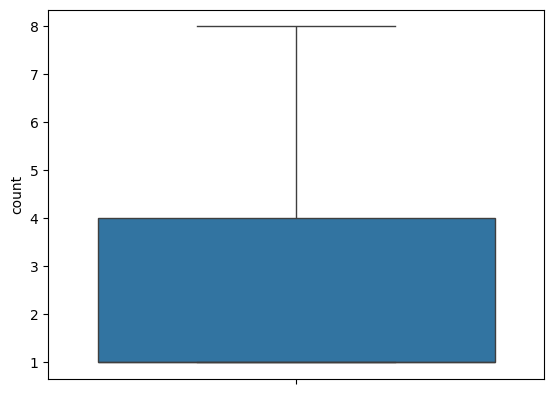

In [149]:
sns.boxplot(df_kw.value_counts(['keyword']), showfliers=False)
plt.show()

In [161]:
keyword_count = df_kw.value_counts(['keyword'])
keyword_count_dict = {key[0]:value for key, value in dict(keyword_count).items()}
keyword_count_dict

{'study and teaching': 867,
 'estudo e ensino': 847,
 'construcao civil': 557,
 'engenharia': 539,
 'building': 499,
 'analise': 465,
 'analysis': 438,
 'alimentos': 435,
 'computacao': 430,
 'engineering': 415,
 'computadores': 400,
 'energia eletrica': 389,
 'ensino': 387,
 'desenvolvimento': 386,
 'teaching': 375,
 'matematica': 366,
 'sustentabilidade': 363,
 'sustainability': 362,
 'software': 362,
 'computer science': 361,
 'industrial safety': 360,
 'tecnologia': 360,
 'seguranca do trabalho': 359,
 'mathematics': 356,
 'education': 351,
 'energia': 342,
 'technology': 334,
 'computer software': 329,
 'pr': 327,
 'engenharia mecanica': 326,
 'mechanical engineering': 326,
 'industria': 325,
 'agua': 322,
 'development': 303,
 'engenharia eletrica': 301,
 'food': 300,
 'electric engineering': 298,
 'educacao': 279,
 'brazil': 272,
 'controle de qualidade': 268,
 'science': 267,
 'automacao': 267,
 'automation': 266,
 'curitiba': 265,
 'metodologia': 263,
 'qualidade': 260,
 'meth

In [ ]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

max = keyword_count.max()
min = keyword_count.min()
keyword_freq_dict = {key: float(value - min)/float(max-min) for key, value in keyword_count_dict.items()}
# lower max_font_size
wordcloud = WordCloud(background_color='white', width=800, height=800).generate_from_frequencies(keyword_freq_dict)

plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

ValueError: too many values to unpack (expected 2)